(If you haven’t played with nonparametric regression before, try this version)
 
Pick some linear function y = kx + a.  Choose a bunch of random x values, calculate y, and plot the resulting points.  Determine the best-fit line.  You really, really should be able to do this exactly! 😊
Now, add uncertainty.  I recommend adding Gaussian errors (you can use numpy.random.normal), but add some sort of errors in both x and y. 
Determine the best-fit line to the resulting points.  How does this compare with the line you actually used to generate the points?
Can you explain what’s going on?  [Hint1 in ROT13: Cerfhznoyl lbh gevrq gb svg sbe l(k) naq tbg fbzrguvat jrveq.  Jung vs lbh unq gevrq svggvat sbe k(l) vafgrnq?   Hint2: Jung rknpgyl ner gur nffhzcgvbaf hfrq jura lbh qb n yrnfg fdhnerf erterffvba (be jungrire lbh pubfr vafgrnq)?  Ubj qb gubfr nffhzcgvbaf nccyl gb gur gjb yvarne svgf va gur cerivbhf uvag?]
 
(If you have played with nonparametric regression before, try this version instead)
 
Pick some arbitrary function y(x).  Choose a bunch of random x values, calculate y, and plot the resulting points.  Determine the best-fit function.  
Now, add uncertainty.  I recommend adding Gaussian errors (you can use numpy.random.normal), but add some sort of errors in both x and y. 
Determine the best-fit function to the resulting points.  How does this compare with the function you actually used to generate the points?
Can you explain what’s going on? 

0 152.26829528808594
99 1.001518964767456
198 1.0014774799346924
Result: y = 3.4587454795837402 x + 1.6720987558364868
std of the residuals: 0.3164612948894501


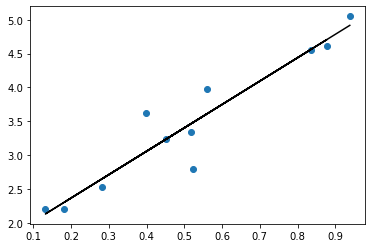

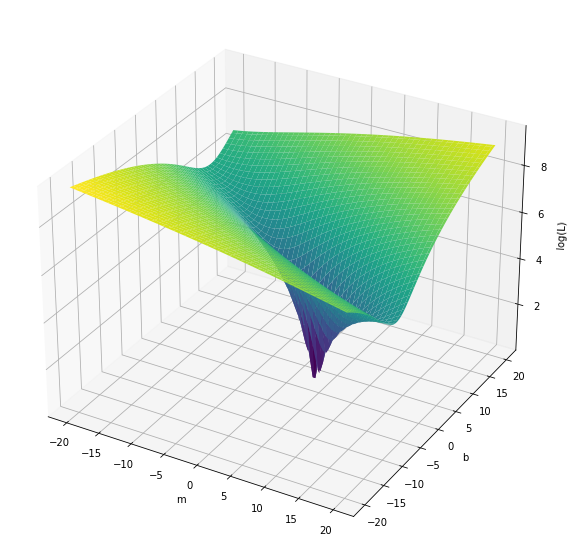

In [3]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
torch.set_default_device("cpu")

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
n_points = 11
x = torch.rand(n_points, dtype=dtype)
y = 3 * x + 2

# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
m = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 0.05

# add random gaussian errors to x and y
x += torch.randn(n_points) *.1
y += torch.randn(n_points) *.1

for t in range(200):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = m * x + b

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 99 == 0:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        m -= learning_rate * m.grad
        b -= learning_rate * b.grad

        # Manually zero the gradients after updating weights
        m.grad = None
        b.grad = None

print(f'Result: y = {m.item()} x + {b.item()}')

# std of the residuals
residuals = y - y_pred
print(f'std of the residuals: {residuals.std()}')

# plot the data
import matplotlib.pyplot as plt
plt.plot(x.numpy(), y.numpy(), 'o')
plt.plot(x.numpy(), y_pred.detach().numpy(), 'k-')
plt.show()

# seaborn 3d plot of the loss function
import numpy as np

def loss_function(m, b):
    return (m * x + b - y).pow(2).sum()

m_grid = np.linspace(-20, 20, 100)
b_grid = np.linspace(-20, 20, 100)

M, B = np.meshgrid(m_grid, b_grid)
L = np.zeros_like(M)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        L[i, j] = loss_function(M[i, j], B[i, j])

%matplotlib inline
# seaborn 3d plot of the loss function

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, np.log(L), cmap='viridis')
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('log(L)')
plt.show()